# MALIS Lab Session 1 - Fall 2021
## Due date: November 18 - 23:59

**Group :** **GG**

**Federico GERMINARIO, Andrea GHIGLIONE**

The aim of this lab is to practice with linear models for both regression and classification via simple experiments. 

#### Learning goals
After this lab, you should be able to:
1. Interpret the coefficent estimates produced by a linear model
2. Be familiar with the use of polynomial and categorical features
3. Be familiar with the building blocks of a pipeline to make building, fitting, and tracking models easier
3. Be able to make an informed choice of model based on the data at hand
4. Understand the key differences between nearest neighbor and linear models

#### Instructions:
Experiments should be made by groups of two students. Each group should produce a Jupyter Notebook with all their results and comments. 

Submit your complete notebook as an archive (tar -cf groupXnotebook.tar lab1/).

## Part 1: Linear Regression
In this part, we will be working with a dataset scraped by <a href="https://www.kaggle.com/mauryashubham/linear-regression-to-predict-market-value/data">Shubham Maurya</a>, which collects facts about players in the English Premier League as of 2017. His original goal was to establish if there was a relationship between a player's popularity and his market value, as estimated by transfermrkt.com.

**Your goal is to fit a model able to predict a player's market value.**

The dataset contains the following information:

| **Field**   |     **Description**      |  
|-------------|-------------|
| name   |  Name of the player | 
| club   |  Club of the player |
| age    | Age of the player |
|position| The usual position on the pitch|
|position_cat| 1 for attackers, 2 for midfielders, 3 for defenders, 4 for goalkeepers|
|market_value| As on transfermrkt.com on July 20th, 2017|
|page_views| Average daily Wikipedia page views from September 1, 2016 to May 1, 2017|
|fpl_value| Value in Fantasy Premier League as on July 20th, 2017|
|fpl_sel| % of FPL players who have selected that player in their team|
|fpl_points| FPL points accumulated over the previous season|
|region| 1 for England, 2 for EU, 3 for Americas, 4 for Rest of World|
|nationality| Player's nationality|
|new_foreign| Whether a new signing from a different league, for 2017/18 (till 20th July)|
|age_cat| a categorical version of the Age feature|
|club_id| a numerical version of the Club feature|
|big_club| Whether one of the Top 6 clubs|
|new_signing| Whether a new signing for 2017/18 (till 20th July)|

**Step 1:** The very first step is to have a deeper look into the data:
1. Using pandas extract a dataframe called *league_df* from the file *football_data.csv* which is inside the folder *data* (as done similarly in Lab_0)
2. Print the result of the method  ```name_dataframe.d_types```, in this way you print out the data types associated to each of the fields in the table
3. Run the method ```name_dataframe.head(N)``` to look at first N instances of the dataframe.
4. Use the method ```name_dataframe.describe( )``` to generate descriptive statistics that summarize each field of the dataframe

In [1]:
# Do NOT write in this cell, do NOT modify this cell
import numpy as np
np.random.seed(11)
print_solutions=False

In [2]:
import pandas as pd

N = 5
league_df = pd.read_csv("data/football_data.csv")
print(league_df.dtypes)
league_df.head(N)

name             object
club             object
age               int64
position         object
position_cat      int64
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel          object
fpl_points        int64
region          float64
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
dtype: object


,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [3]:
league_df.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [4]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/step1_0.py

In [5]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/step1_1.py

**Step 2 - Prepare the data:**
We split our data into two sets: one data set for training and another one that we will use at the end to test our model.

1. Import the function ```train_test_split``` from ```sklearn.model_selection```
2. Split your *league_df* in **input_df** made of all features except *market_value*, and **output_df** made of the feature *market_value* (*Hint :* to copy the values of a dataframe to another use the method ```name_dataframe['name_attribute'].copy()```, to drop an attribute use ```name_dataframe.drop('name_attribute',axis=1)```)
3. Use ```train_test_split``` with a *test_size*=0.25 (25 % of inputs became the test set) in following way to obtain a train set and a test set.

    ```X_train, X_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.2)```



In [6]:
from sklearn.model_selection import train_test_split #Step 1
output_df=league_df['market_value'].copy() #Step 2
input_df=league_df.drop(['market_value'],axis=1)

In [7]:
if print_solutions==True :
    %load ./solutions/step2.py
    
X_train, X_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.25)

The dataset contains a lot of features that can be used to build the model. We will start by using <code>age, fpl_value, big_club</code> and <code>page_views</code>. 

\begin{equation}
 \hat{y} = W_0 + W_1\ x_{age} + W_2\ x_{fplavalue} + W_3\ x_{bigclub} + W_4\ \sqrt{x_{pageviews}}
\end{equation}

We need to use *numpy* library and

<code>from sklearn.preprocessing import PolynomialFeatures<\code>

we define a function called *prepare_data(name_dataframe)* which does the following:
1. extract the above features from the dataframe and assign to a variable
2. apply the *np.sqrt( )* on the values of <code>page_views</code>
3. transform our variable in numpy array <code>np.array(variable)</code>
4. and then add a columns of ones (for the variable of $W_0$) to the dummy variable
5. return our variable
    
We then apply our function to *X_train* and *X_test* to obtain *input_train1* and *input_test1* respectively
Then we create also *output_train* and *output_test* moving to numpy array *y_train1* and *y_test1* respectively. Test data will be used later in the code


In [8]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

def prepare_data(df):
    variable = df[['age', 'fpl_value', 'big_club']].copy()
    variable['sqrt_page_views'] = np.sqrt(df[['page_views']])
    variable_array = np.array(variable)
    variable_array = PolynomialFeatures(1).fit_transform(variable_array)

    return variable_array

input_train1 = prepare_data(X_train)
input_test1 = prepare_data(X_test)
output_train1 = np.array(y_train)
output_test1 = np.array(y_test)

**Step 3 - Training**

Here we define a class called *my_linear_regression* which initializes with *__init__(self)* as empty the properties self.X_train, self.y_train and self.weights. Then we define the method *fit()* of the class which needs as parameters a matrix (X) and an array (y) with the outputs. With those parameters the class initializes self.x_train, self.y_train using the matrix and the array respectively and self.weigths using the formula of the linear regression: $$\hat{W}=(𝑿^𝑇\ 𝑿)^{−1}𝑿^𝑇\ 𝒚$$

We are using the function *np.linalg.solve*($𝑿^𝑇\ 𝑿,𝑿^𝑇\ 𝒚$) to obtain $\hat{W}$ because it is more efficient than matrix inversion and it avoids numerical inestabilities.

The last function in the object *my_linear_regression* is the function *predict()*. Given the weights obtained through fit, this method estimates new y values using the input matrix X_test: 

<code>self.y_hat=np.sum(X*self.weights,axis=1)<\code>

The function also receives an array y with the true y values to compute the mean square error (MSE) using the formula : $$MSE = \dfrac{1}{N}\sum_{i=1}^{N}(y_i -\hat{y}_i)^2$$, where $y_i$ is y_test[i]. 
    
**Implement the MSE.**

In [9]:
class my_linear_regression:
    def __init__(self) : # initialize constructor for the object to assign the object its properties
        self.X_train = []
        self.y_train = []
        self.weights = []
        
    def fit(self, X, y) :
        self.X_train = X
        self.y_train = y
        self.weights = np.linalg.solve(X.T@X,X.T@y)
    
    def predict(self,x_test,y_test) : # method of the object that can be used
        self.y_hat=np.sum(x_test*self.weights,axis=1)
        
        self.MSE= 1/len(self.y_hat) * np.sum(((y_test - self.y_hat) ** 2))
        
        return self.y_hat, self.MSE

Run your class by creating an object called *model_1* and fit it using the training data *(input_train1, output_train1)*, then predict the *y_hat* using the the **training** (NOT test) inputs and the training targets. Finally print the output of your weights weight[0], weight[1:] and your MSE obtained to see the parameters of your model and its performance with training data. (*Hint :* *model_1.property_name*)

In [10]:
model_1 = my_linear_regression()
model_1.fit(input_train1, output_train1)
model_1.predict(input_train1, output_train1)
print(f"Weights are: {model_1.weights}")
print(f"MSE is: {model_1.MSE}")

Weights are: [-19.11162815  -0.11391484   4.51149558   5.17434206   0.29202352]
MSE is: 43.033709019828834


In [11]:
if print_solutions==True :
    %load ./solutions/step3.py

In [12]:
# COMPARISON OF YOUR MSE RESULT WITH CORRECT ONE
# You should see an error smaller than 10^(-8)
import check 

print("############# absolute error in training MSE computation #############\n")
print('absolute error case 1 = %e \n' %abs(model_1.MSE-check.MSE_train_correct_1))
print("######################################################################\n")

############# absolute error in training MSE computation #############

absolute error case 1 = 7.105427e-15 

######################################################################



The estimated weights W (excluding $W_0$) are associated to 'age', 'fpl_value', 'big_club' and 'page_views'. 

<div class="alert alert-info">

**Question 1:** How do you interpret the values of each of these parameters? Based on this information, what can you say about the effect in a player's market value of his:
    1. age?
    2. number of page views?
    3. fpl value?

Which of these features seems to have the largest effect on a player's value?
</div>

<div class="alert alert-info">
    
**Answer 1:**
    Values for 'age' and 'page_views' are low, so they affect less the result with respect of 'fpl_value' and 'big_club' which have higher weights. 
The larger effect is given by the feature 'big_club', followed by 'fpl_value' , which makes sense since the value of a player is strongly dependent of where he plays (if he plays in a big club it means he is good at football) and the value of Fantasy Premier League is correlated as well with the quality of a footballer since it is a game that simulates football's market in Premier League. The feature 'age' has a low value since it is not linearly correlated with the player's value (young players have lower experience so they have a lower evaluation, while old players have less physical performances with respect to younger players). Views on wikipedia are not that relevant in defining a player's value on the market.
</div>

In [13]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/question1.py
    

# do NOT modify this cell, convert it into Markdown cell after load
if print_solutions==True :
    %load ./solutions/question1.md

#### Including polynomial features
A *scatter matrix* is a pair-wise scatter plot of several variables presented in a matrix format. It can be used to determine whether the variables are correlated and whether the correlation is positive or negative.

From the scatter matrix below we can explore the relationship that each "potential" input variable has with the target variable: the market value. 

When looking at the correlation between age and market value (first column, last row), it does not seem to be linear. 

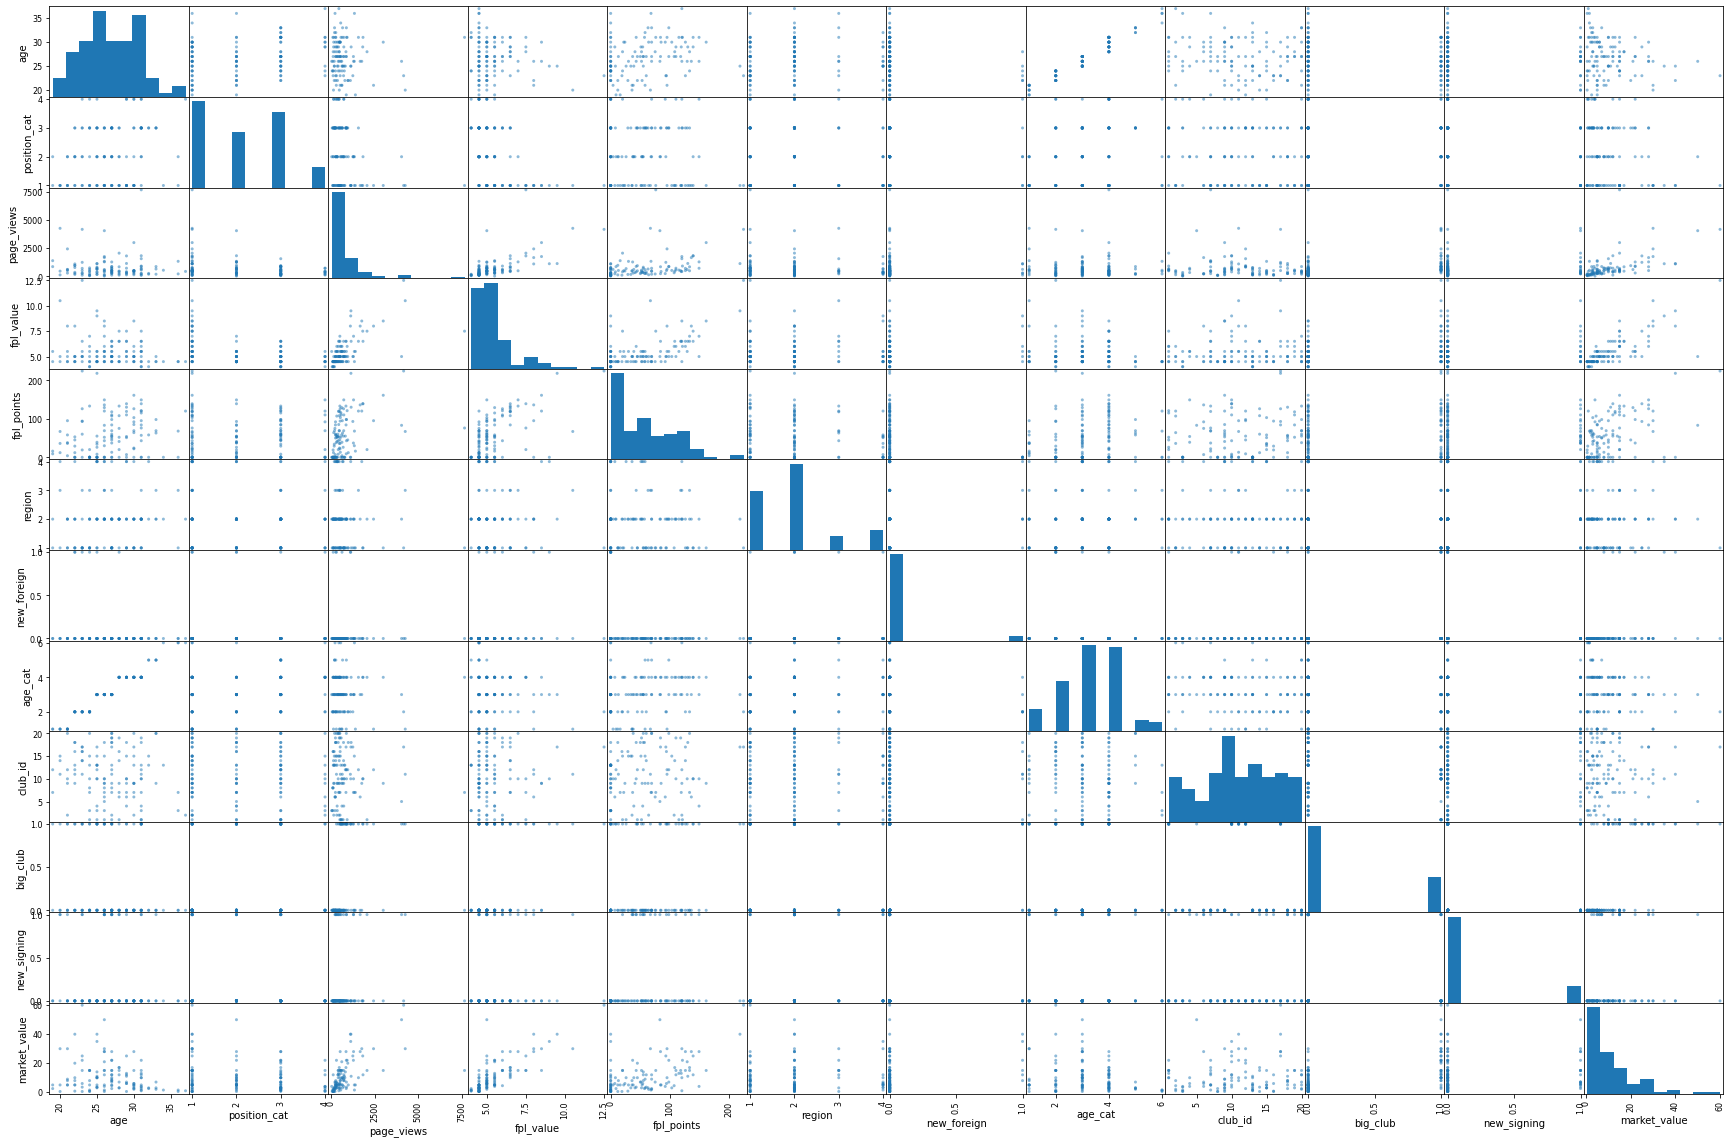

In [15]:
from pandas.plotting import scatter_matrix
to_plot=pd.concat([X_test,y_test],axis=1)
scatter_matrix(to_plot, figsize=(30,20));

In more detail:

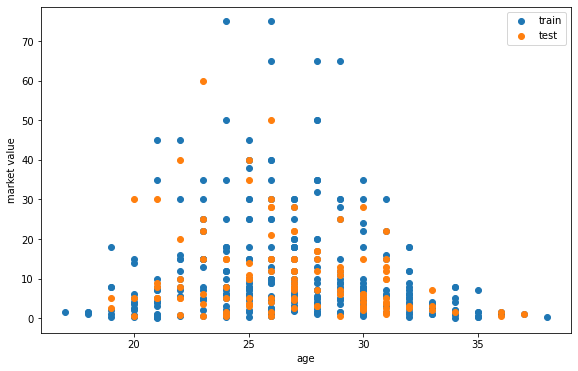

In [16]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [9.5, 6]
plt.scatter(input_train1[:,1], output_train1)
plt.scatter(input_test1[:,1], output_test1)
plt.legend(['train', 'test'])
plt.xlabel('age')
plt.ylabel('market value')
plt.show()

Let us explore considering a more complex effect of the age by including a quadratic term: 

\begin{equation}
 \hat{y} = w_0 + w_1* x_{age} + w_2* x_{fplvalue} + w_3*x_{bigclub} + w_4*\sqrt{x_{pageviews}} + w_5*x_{age}^2
\end{equation}

The function below prepares the data to fit to this new model.

<div class="alert alert-info">

**Exercise 2:** Create a new function *prepare_new_data(name_dataframe)* as done before, but which includes also the quadratic term regarding the age this time. Then as done before create input_train_2, input_test_2, output_train_2 and output_test_2 and run your linear regression (you need only to run your class, not to define again the class) but initialize a new object. (E.g. *model_2=my_linear_regression(...)*). Again show the weights and the resulting MSE for the training data.

</div>

In [17]:
def prepare_new_data(df):
    variable = df[['age', 'fpl_value', 'big_club']].copy()
    variable['sqrt_page_views'] = np.sqrt(df[['page_views']])
    variable['squared_age'] = np.power(df[['age']], 2)
    variable_array = np.array(variable)
    variable_array = PolynomialFeatures(1).fit_transform(variable_array)

    return variable_array

input_train_2 = prepare_new_data(X_train)
input_test_2 = prepare_new_data(X_test)
output_train_2 = np.array(y_train)
output_test_2 = np.array(y_test)

In [18]:
model_2 = my_linear_regression()
model_2.fit(input_train_2, output_train_2)
model_2.predict(input_train_2, output_train_2)
print(f"Weights are: {model_2.weights}")
print(f"MSE is: {model_2.MSE}")

Weights are: [-96.59926791   5.95534714   3.83273605   5.52299435   0.32873672
  -0.11229756]
MSE is: 37.85294206603823


In [19]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/exercise2.py
    

In [20]:
# COMPARISON OF YOUR MSE RESULT WITH CORRECT ONE
# You should see an error smaller than 10^(-8)

print("############# absolute error in training MSE computation #############\n")
print('absolute error case 2 = %e \n' %abs(model_2.MSE-check.MSE_train_correct_2))
print("######################################################################\n")

############# absolute error in training MSE computation #############

absolute error case 2 = 1.421085e-14 

######################################################################



<div class="alert alert-info">

**Question 2:** Based on your MSE and weights results, what can you say about adding this term $age^2$ to your model?

</div>

<div class="alert alert-info">
    
**Answer 2:** 
    Adding the term 'age' squared implies a polynomial regression, which is fitting better as we can see in a lower MSE with respect to the one of model 1. In this way, we can address the problem of above where the age feature was in a non-linear relation with the target value: now thanks to the age squared term we can represent such a non-linear relation as well. Anyway we have to be careful, since polynomial features can cause overfitting, which implies a poor generalization of the model. 
</div>

#### Including categorical features
It is well known that the position where a football player plays has an impact in his market value. Midfielders and stikers tend to be more expensive. *Your goal now is to include this information in the model.*  

As seen from the description, the player position is encoded as a numeric variable (1, 2, 3, 4). However, they represent categories and not values on their own. Categorical variables are commonly encoded under a scheme denoted 1-of-K encoding. This allows to convert a variable representing K different categories into K different binary values. Example: 

| **attacker**   |     **midfielder** | **defender** | **goalkeeper**      |  
|-------------|-------------|-------------|-------------|
| 1   |  0 | 0 | 0 |
| 0   |  1 | 0 | 0 |
| 0   |  0 | 1 | 0 |
| 0   |  0 | 0 | 1 |


**Look carefully below** how to implement 1-of-K encoding so that your model includes information about a player's position
\begin{equation}
 \hat{y} = w_0 + w_1*x_{age} + w_2*x_{fplvalue} + w_3*x_{bigclub} + w_4*x_{pageviews} + w_5*x_{age}^2 + w_6*x_{attaker} + w_7*x_{midfielder} + w_8*x_{defender} +w_9*x_{goalkeeper}
\end{equation}    



In [21]:
def prepare_data_with_position(df):
    variable = df[['age', 'fpl_value', 'big_club']].copy()
    variable['sqrt_page_views'] = np.sqrt(df[['page_views']])
    variable['square_age'] = np.power( df[['age']],2)
    variable=variable.join(pd.get_dummies(df.position_cat, prefix='pos')) # get_dummies to create 1-of-K encoding, join to add the new columns
    variable_array = np.array(variable)
    variable_array = PolynomialFeatures(1).fit_transform(variable_array)
    
    return variable_array

<div class="alert alert-info">

**Exercise 3:** As done before create input_train3, input_test3, output_train3 and output_test3 but using this time the function *prepare_data_with_position(df)*  and run you linear regression (you need only to run it, not to define it) creating a new object (E.g. *model_3=my_linear_regression(...)*). Again show the weights and the resulting MSE for this new model with training data.

</div>

In [22]:
input_train_3 = prepare_data_with_position(X_train)
input_test_3 = prepare_data_with_position(X_test)
output_train_3 = np.array(y_train)
output_test_3 = np.array(y_test)

model_3 = my_linear_regression()
model_3.fit(input_train_3, output_train_3)
model_3.predict(input_train_3, output_train_3)
print(f"Weights are: {model_3.weights}")
print(f"MSE is: {model_3.MSE}")

Weights are: [-1.35661789e+02  5.22348717e+00  5.51839623e+00  3.73696787e+00
  3.04600672e-01 -1.01241544e-01  3.82441849e+01  4.43167376e+01
  4.44466790e+01  4.56666667e+01]
MSE is: 32.56963959236949


In [23]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/exercise3_0.py

In [24]:
# COMPARISON OF YOUR MSE RESULT WITH CORRECT ONE
# You should see an error smaller than 10^(-8)

print("############# absolute error in training MSE computation #############\n")
print('absolute error case 3 = %e \n' %abs(model_3.MSE-check.MSE_train_correct_3))
print("######################################################################\n")

############# absolute error in training MSE computation #############

absolute error case 3 = 1.421085e-14 

######################################################################



Now **print** the MSE for training in the 3 cases and then **test** your 3 models (use the predict function they have) with their respective test data and print the MSE for testing in the 3 cases.
E.g. model_1.predict(input_test1,output_test1)

In [25]:
train_MSE_1 = model_1.MSE
train_MSE_2 = model_2.MSE
train_MSE_3 = model_3.MSE

In [26]:
print(f"Training MSE of model 1 is: {train_MSE_1}")
print(f"Training MSE of model 2 is: {train_MSE_2}")
print(f"Training MSE of model 3 is: {train_MSE_3}")
model_1.predict(input_test1,output_test1)
model_2.predict(input_test_2,output_test_2)
model_3.predict(input_test_3,output_test_3)
test_MSE_1 = model_1.MSE
test_MSE_2 = model_2.MSE
test_MSE_3 = model_3.MSE
print(f"Test MSE of model 1 is: {test_MSE_1}" )
print(f"Test MSE of model 2 is: {test_MSE_2}" )
print(f"Test MSE of model 3 is: {test_MSE_3}" )

Training MSE of model 1 is: 43.033709019828834
Training MSE of model 2 is: 37.85294206603823
Training MSE of model 3 is: 32.56963959236949
Test MSE of model 1 is: 36.74870366001152
Test MSE of model 2 is: 33.504843402351874
Test MSE of model 3 is: 34.42512492881027


In [27]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/exercise3_1.py

In [28]:
# COMPARISON OF YOUR MSE RESULTS WITH CORRECT ONES
# You should see errorS smaller than 10^(-8)

print("############# absolute error in test MSE computation #################\n")
print('absolute error case 1 = %e \n' %abs(model_1.MSE-check.MSE_test_correct_1))
print('absolute error case 2 = %e \n' %abs(model_2.MSE-check.MSE_test_correct_2))
print('absolute error case 3 = %e \n' %abs(model_3.MSE-check.MSE_test_correct_3))
print("######################################################################\n")

############# absolute error in test MSE computation #################

absolute error case 1 = 9.237056e-14 

absolute error case 2 = 7.176482e-13 

absolute error case 3 = 1.776357e-13 

######################################################################




<div class="alert alert-info">

**Question 3:** Based on your results, what can you say about adding the player's position to your model?

</div>

<div class="alert alert-info">
    
**Answer 3:** 
    Adding the player's position brought to a lower training MSE, however as we can see from the test MSE this addition is leading to a small amount of overfitting. We highlight that one hot encoding could worsen the results of training as well. In particular, if the cardinality of the features is high we would introduce a big number of columns that would end in being noise (curse of dimensionality problem). However, in this case we are introducing only 4 columns which is acceptable.
</div>

<div class="alert alert-info">

**Exercise 4:** To deal with the apparent non-linear relationship between age and market value, 
<a href="https://www.kaggle.com/mauryashubham/linear-regression-to-predict-market-value/data">Shubham Maurya</a> suggests to use categorical features for the age. Using your implementation of the 1-of-K encoding, include the age categorical features into the model (create a new *prepare_data_with_position_and_age()* function with also the categorical age).

It is up to you to decide if you will keep or not as before also $x_{age}$ and $x_{age}^2$ as non categorical features. Whichever your choice is, <u>justify clearly your answer</u>. 
    
Run the model and print and compare now the training error (MSE) for the four models.

</div>

In [29]:
# Age and age^2 are obviously correlated with categorical encoded ages, however these last features may capture
# some information that was not included in age and age^2 features and viceversa. For this reason we decided to
# keep age and age^2 as well.

In [30]:
def prepare_data_with_position_and_age(df):
    variable = df[['age','fpl_value', 'big_club']].copy()
    variable['sqrt_page_views'] = np.sqrt(df[['page_views']])
    variable['square_age'] = np.power( df[['age']],2)
    variable=variable.join(pd.get_dummies(df.position_cat, prefix='pos')) # get_dummies to create 1-of-K encoding, join to add the new columns
    variable=variable.join(pd.get_dummies(df.age_cat, prefix='ages')) # get_dummies to create 1-of-K encoding, join to add the new columns
    variable_array = np.array(variable)
    variable_array = PolynomialFeatures(1).fit_transform(variable_array)

    return variable_array

In [31]:
input_train_4 = prepare_data_with_position_and_age(X_train)
input_test_4 = prepare_data_with_position_and_age(X_test)
output_train_4 = np.array(y_train)
output_test_4 = np.array(y_test)

model_4 = my_linear_regression()
model_4.fit(input_train_4, output_train_4)
model_4.predict(input_train_4, output_train_4)
print(f"Weights are: {model_4.weights}")
print(f"MSE is: {model_4.MSE}")

Weights are: [ 1.75375671e+02  2.03814658e+00  5.53375603e+00  3.71588454e+00
  3.01876809e-01 -4.40087817e-02 -5.84694009e+02 -5.78485042e+02
 -5.78440827e+02 -5.77088259e+02  3.52196728e+02  3.55156417e+02
  3.55940060e+02  3.56263432e+02  3.54558389e+02  3.52956522e+02]
MSE is: 32.257587947902685


In [32]:
train_MSE_4 = model_4.MSE

In [33]:
print(f"Training MSE of model 1 is: {train_MSE_1}" )
print(f"Training MSE of model 2 is: {train_MSE_2}" )
print(f"Training MSE of model 3 is: {train_MSE_3}" )
print(f"Training MSE of model 4 is: {train_MSE_4}" )

Training MSE of model 1 is: 43.033709019828834
Training MSE of model 2 is: 37.85294206603823
Training MSE of model 3 is: 32.56963959236949
Training MSE of model 4 is: 32.257587947902685


In [34]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/exercise4.py

In [35]:
# COMPARISON OF YOUR MSE RESULT WITH CORRECT ONE
# You should see error smaller than 10^(-8)

print("############# absolute error in training MSE computation #############\n")
print('absolute error case 4 = %e \n' %abs(model_4.MSE-check.MSE_train_correct_4))
print("######################################################################\n")

############# absolute error in training MSE computation #############

absolute error case 4 = 0.000000e+00 

######################################################################



<div class="alert alert-info">

**Question 4:** Based on your MSE results, which model would you choose to predict a player's market value? Justify your answer.

</div>

<div class="alert alert-info">
    
**Answer 4:**
    At this point we have only training MSE; it would be useful having a validation as well in order to check overfitting. By looking at what we calculated so far, we would choose the third model, since it has a training MSE which is very close to the best training MSE we calculated (model 4) but it has a smaller number of features (simpler model). Model 1 and model 2 have higher training MSE values and for that reason we didnd't prefer them.
    Finally, by looking at the test MSE we calculated so far (model 1, model 2, model 3) we would confirm our choice (model 3) since it has the lower absolute difference between train and test. We will see later that model 4 has a larger difference between train and test MSE as well.
</div>

**Step 4 - Prediction:** Now, use the models to predict the market value of the players in the respective test data and print the test error.

In [36]:
model_4.predict(input_test_4, output_test_4)
test_MSE_4 =  model_4.MSE
print(f"MSE on test data with model_1: {test_MSE_1}")
print(f"MSE on test data with model_2: {test_MSE_2}")
print(f"MSE on test data with model_3: {test_MSE_3}")
print(f"MSE on test data with model_4: {test_MSE_4}")

MSE on test data with model_1: 36.74870366001152
MSE on test data with model_2: 33.504843402351874
MSE on test data with model_3: 34.42512492881027
MSE on test data with model_4: 35.38707250258213


In [37]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/step4.py

In [38]:
# COMPARISON OF YOUR MSE RESULT WITH CORRECT ONE
# You should see error smaller than 10^(-8)

print("############# absolute error in test MSE computation #############\n")
print('absolute error case 4 = %e \n' %abs(model_4.MSE-check.MSE_test_correct_4))
print("######################################################################\n")

############# absolute error in test MSE computation #############

absolute error case 4 = 1.666223e-11 

######################################################################



<div class="alert alert-info">

**Question 5:** How did your model do? Was it the best performing? Based on your intuition (as this topic has not been yet covered), try to explain the obtained performance (i.e. why some models do better than others)? 

</div>

<div class="alert alert-info">
    
**Answer 5:**
    The four models performed in different ways.
    The first model is the one which achieved the worst performances and it can be explained by the fact that the features we picked up are not enough to have a good final prediction. In particular the MSE of the train is way higher than the test's MSE which could be explained by the fact that there could be a sampling bias in the test set and so the result is not reliable (we should perform a stratified cross validation to have a more reliable result or we could try different random seeds). 
    The second model achieved better performances on both training and test set in terms of MSE, this is caused from the introduction of an additional feature ('age' squared) which handles the non-linear relation between age and the target value, however we still have a problem of sampling bias in the test.
    The third model is showing a small amount of overfitting (however such a small difference may be acceptable) which occurs when the training error is lower than the test error. In order to have a good model we have to make sure that the model is able to generalize.
    The fourth model is overfitting more than model 3. We can explain that because of the introduction of additional features from the one hot encoding. This encoding technique is useful to move from categorical to numerical data, however it introduces a column per selected-features' category. So when the cardinality of the selected feature is high (with respect to the number of data) we may encounter the curse of dimensionality.
</div>

# Part 2: Linear Models for Classification


In this part, we will be working with the <a href="https://archive.ics.uci.edu/ml/datasets/heart+Disease">Heart Disease dataset</a>, from the <a href="https://archive.ics.uci.edu/ml/index.php">UCI Machine Learning Repository</a>. 

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database that we will use is the only one that has been used by ML researchers to this date. The "diagnosis" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Additionally, there is a condition field that labels subjects as healthy (H, which is equivalent to condition 0) or with a diagnosed disease (D, which gathers any subject with condition 1-4). 

Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

**The goal of this section is to build two classifiers: ona that can discriminate healthy from diseased subjects and a second one that can precisely identify the diagnosis of a subject.**

The dataset contains the following information:

| **Field**   |     **Description**      |  
|-------------|-------------|
| age         |  age in years |
| sex         |  (1 = male; 0 = female) |
|cp           |chest pain type |
|trestbps     |resting blood pressure (in mm Hg on admission to the hospital)|
|cholserum  |  cholestoral in mg/dl|
|fbs        |(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)|
|restecg | resting electrocardiographic results|
|thalach |maximum heart rate achieved|
|exang | exercise induced angina (1 = yes; 0 = no)|
|oldpeak | ST depression induced by exercise relative to rest |
|slope |the slope of the peak exercise ST segment |
|ca | number of major vessels (0-3) colored by flourosopy |
|thal | 3 = normal; 6 = fixed defect; 7 = reversable defect|
| diagnosis | 0= normal, 1,2,3,4 disease conditions|
| condition | H=Healthy D=Diseased |

**Step 1:** As usual, we start by inspecting the dataset, split in training and test and prepare the data

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

np.random.seed(2)

heart_df_full=pd.read_csv('./data/processed.cleveland.data') # read_csv since the file contains commas to separate fields
heart_df=heart_df_full[~(heart_df_full == '?').any(1)]

print('FIELDS:\n\n',heart_df.dtypes)
print('\nValues in the dataframe\n')
heart_df.head()

FIELDS:

 age          float64
sex          float64
cp           float64
trestbps     float64
chol         float64
fbs          float64
restecg      float64
thalach      float64
exang        float64
oldpeak      float64
slope        float64
ca            object
thal          object
diagnosis      int64
condition     object
dtype: object

Values in the dataframe



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis,condition
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,H
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,D
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,D
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,H
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,H


In [40]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [41]:
# We split the data into training and testing

X_train, X_test, y_train_all, y_test_all=train_test_split(heart_df.drop(['condition','diagnosis'], axis=1), heart_df[['condition','diagnosis']], test_size=60)
y_train=y_train_all['condition']
y_test=y_test_all['condition']

# We define the function to prepare the data (1-of-K encoding for some variables)

def prepare_data(df):
    X_cols = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].copy()
    X_cols=X_cols.join(pd.get_dummies(df.sex, prefix='sex'))
    X_cols=X_cols.join(pd.get_dummies(df.cp, prefix='cp'))
    X_cols=X_cols.join(pd.get_dummies(df.fbs, prefix='fbs'))
    X_cols=X_cols.join(pd.get_dummies(df.restecg, prefix='restecg'))
    X_cols=X_cols.join(pd.get_dummies(df.exang, prefix='exang'))
    X_cols=X_cols.join(pd.get_dummies(df.slope, prefix='slope'))
    X_cols=X_cols.join(pd.get_dummies(df.ca, prefix='ca'))
    X_cols=X_cols.join(pd.get_dummies(df.thal, prefix='thal'))
    
    X = X_cols.values # from dataframe to numpy
    
    return X

# We prepare the data

input_train = prepare_data(X_train)
input_test = prepare_data(X_test)

<div class="alert alert-info"> 

**Question 6:** Which features have been encoded using 1-of-K encoding? Why? <u>justify your answer</u>. 

</div>

Before answering, we will inspect the cardinality of the features

In [42]:
encoded_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
heart_df[encoded_features].apply(pd.Series.nunique)

sex        2
cp         4
fbs        2
restecg    3
exang      2
slope      3
ca         4
thal       3
dtype: int64

In [43]:
not_encoded_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart_df[not_encoded_features].apply(pd.Series.nunique)

age          41
trestbps     50
chol        152
thalach      91
oldpeak      40
dtype: int64

<div class="alert alert-info">
    
**Answer 6:** 
    The features that have been encoded are: sex, cp, fbs, restecg, exang, slope, ca, thal. The features 'ca' and 'thal' are of type object and have been encoded; in particular 'thal' feature has a cardinality of 3 and to each value corresponds a condition, similarly for 'ca' which introduces 4 columns only. The other features are float, in particular the features 'sex' , 'fbs' and 'exang' have been encoded since they are binary so we are not introducing a big amount of columns and we are extracting specific features regarding gender, blood sugar and induced angina. A same reasoning can be done for 'cp', 'restecg' and 'slope' with a cardinality of 4, 3 and 3 respectively. As we showed above, the cardinality of all the encoded features is low, while the cardinality of not encoded features is very high, so encoding these features as well would cause a problem of dimensionality and the model will likely perform poorly.
</div>

#### Binary classification
We will first use the input data to train a binary classifier using Logistic Regression. 
This time, we will use the algorithm as implemented by the library <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">scikit-learn.</a>

**Step 2 - Training** is just about using the function logistic regression with input_train and y_train. We will call the LogisticRegression object *LR_model_1*. we will use <code>max_iter=200</code> and <code>solver='liblinear'</code> as parameters when you use LogisticRegression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
LR_model_1 = LogisticRegression(solver='liblinear', max_iter=200)
LR_model_1.fit(input_train, y_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [46]:
print('*************** Estimated parameters: ***********************')
print('[W_0] : ',LR_model_1.intercept_,'\n[W] :', LR_model_1.coef_ )

*************** Estimated parameters: ***********************
[W_0] :  [0.01898137] 
[W] : [[ 0.01877964 -0.02286338 -0.00554382  0.02394405 -0.38879905  0.64376622
  -0.62478485  0.49739334 -0.33870378  0.7774996  -0.91720779 -0.15212733
   0.1711087   0.23163805  0.00201437 -0.21467105  0.06334293 -0.04436157
   0.40614064 -0.33136574 -0.05579354  1.55453787 -0.24998789 -0.54042906
  -0.74513955  0.72431475  0.35061598 -1.05594937]]


<div class="alert alert-info">

**Question 7:** Based on these results, what can you say about the incidence of age in having a heart disease? Of Cholesterol? <u>justify your answer</u>. 

</div>

<div class="alert alert-info">
    
**Answer 7:** 
    Age:its weight is 0.0188, while cholesterol weight is -0.0055. We know that an high weight means a feature to be very important in the prediction of positive class (vice versa for negative class with very low negative weights). In this case both of the weights are close to 0, so the features 'age' and 'cholesterol' are not really important in determining wheter having a disease or not. Pretty surprising, however we have to consider that we have many features related to specific body problems that are clearly more related to the chances of having an heart disease.
</div>

**Step 3 - Predict:** Similarly as we did with the linear regression part, the function below collects the steps needed to predict the output of new data and to then assess the performance. To measure the performance of a classifier we will use accuracy. We define accuracy as:

\begin{equation}
accuracy = \dfrac{\#correct}{\#samples}
\end{equation}

where $\#correct$ denotes the number of correctly classified samples and $\#samples$ the total number of samples under consideration.

<div class="alert alert-info">

**Exercise 6:** Create the function *predict_and_test(LR_model, X, y)* to predict results given *input_test* and then compute accuracy counting the number of correct predictions knowing that *output_test* is the correct prediction. (*Hint :* LogisticRegression objects have their predict function, just call it.). Then use your function to compute the **training** accuracy of your model. Call the accuracy *accuracy_training*

</div>

In [47]:
output_train = y_train.to_numpy()
output_test = y_test.to_numpy()

In [48]:
def predict_and_test(LR_model, X, y):
    prediction = LR_model.predict(X)
    return sum(prediction==y)/len(y)
    

accuracy_training = predict_and_test(LR_model_1, input_train, output_train)
accuracy_test = predict_and_test(LR_model_1, input_test, output_test)
print(f"Train accuracy: {accuracy_training}")
print(f"Test accuracy: {accuracy_test}")

Train accuracy: 0.890295358649789
Test accuracy: 0.8333333333333334


In [49]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/part2_step3.py

In [50]:
# COMPARISON OF YOUR ACCURACY RESULT WITH CORRECT ONE
# You should see error smaller than 10^(-8)
import check

print("############# absolute error in training accuracy computation#########\n")
print('absolute error case 1 = %e \n' %abs(accuracy_training - check.accuracy_training_correct_1))
print("######################################################################\n")

############# absolute error in training accuracy computation#########

absolute error case 1 = 0.000000e+00 

######################################################################



<div class="alert alert-info">

**Question 8:** Is your model capable of differentiating healthy subjects from patients? <u>justify your answer</u>. 

</div>

<div class="alert alert-info">

**Answer 8:**
    We achieved an accuracy of 89% on training set and 83.3% on test set; these are good results that make our model able to distinguish between healthy subjects from patients in around 83 cases over 100 (we take the accuracy of the test since that's where we can have an idea about our model capability to generalize). However, we could do even better because an accuracy of around 83% it's not acceptable in many fields. Here we have to pay attention to the False Negatives i.e. people which are predicted as healthy subjects, but they actually are patients with disease. 
</div>

For the sake of completeness we inspect the confusion matrix of the test

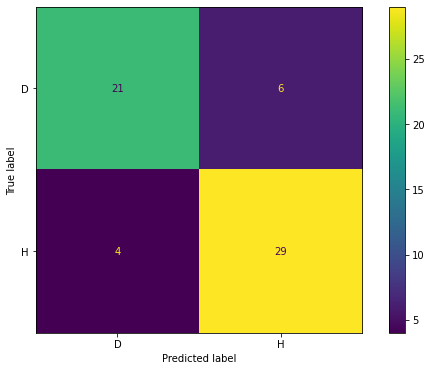

In [51]:
import warnings
from sklearn.metrics import plot_confusion_matrix

warnings.filterwarnings("ignore")

plot_confusion_matrix(LR_model_1, input_test, output_test)
plt.show()

As we know accuracy is (TP+TN)/(TP+TN+FP+FN) = 50/60 = 0.833 , but we have to pay attention to the False Negative Rate which in this case is 0.222: it means that our model will miss a disease patient with a probability of 22.2% which is a pretty high percentage.

### Logistic regression thresholds
An interesting feature of logistic regression is that it hands back *probabilities* of a given case being 1 or 0, rather than just 1s and 0s. That allows to set different cutoffs for what counts as a 1. Let us have a closer look:

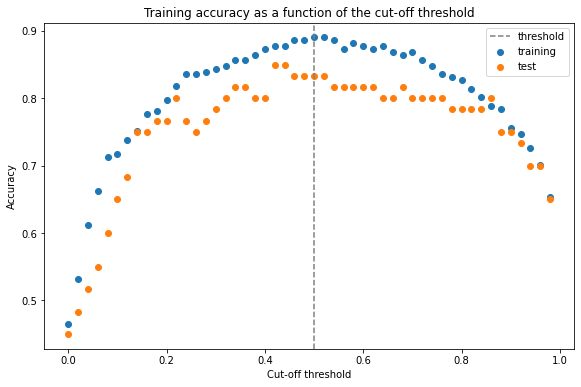

Max training accuracy :  0.890295358649789 
Threshold of maximum training accuracy:  0.5


In [52]:
def explore_thresholds(LR_model, X, y, thresholds):
    '''
    Computes accuracies by varying the cut-off threshold given a model, the input data and a range of thresholds. A ground truth needs to be provided
    to estimate the accuracy
    Works specifically for the Cleveland dataset.
    '''
    y_bool = (y == 'H')
    accuracies = [(np.sum(y_bool ==  ~(LR_model.predict_proba(X)[:,0] >= th)) / len(y)) for th in thresholds]
    
    return accuracies

# generate a range of thresholds from 0 to 1.
h=.02
x_min=0.0
x_max=1.0

thresholds=np.arange(x_min, x_max, h) # set of thresholds from 0 to 1
accuracies = explore_thresholds(LR_model_1, input_train, y_train, thresholds) # computed accuracies for each threshold

plt.rcParams['figure.figsize'] = [9.5, 6]
plt.scatter(thresholds, accuracies)
plt.xlabel('Cut-off threshold')
plt.ylabel('Accuracy')
plt.title('Training accuracy as a function of the cut-off threshold')
plt.axvline(x=0.5,color='gray', linestyle='--') 

accuracies_test = explore_thresholds(LR_model_1, input_test, y_test, thresholds)
plt.scatter(thresholds, accuracies_test)

plt.legend(['threshold', 'training', 'test'])
plt.show()

print('Max training accuracy : ',np.max(accuracies),'\nThreshold of maximum training accuracy: ', thresholds[np.argmax(accuracies)])

The dashed line denotes the threshold value used "by default". 
<div class="alert alert-info">

**Question 9:** Based on this results, would you rather use your "personalized" threshold to predict future samples? If yes, which value? <u>justify your answer</u>. 

</div>

In [53]:
# threshold with highest test accuracy; in this case is the best one since it's also close to the training accuracy
best_threshold = np.argmax(accuracies_test) * h
best_threshold

0.42

<div class="alert alert-info">

**Answer 9:**
    In this case a personalized threshold is better. In particular, we would set the threshold at 0.42 because with such a threshold we obtain the highest test accuracy, which is also closer to the training accuracy with respect to the default threshold of 0.5
</div>

**Replace** <code>custom_t = 0.5</code> with your *personalized* threshold if you have one

In [54]:
#If you chose a specific threshold value to use as cut-off replace 0.5 with your chosen value

custom_t = 0.42

In [55]:
print('******************  Testing accuracy (identifying diseased condition) *********************')
print('ACCURACY: ', predict_and_test(LR_model_1,input_test, y_test))
print('*******************************************************************************************')

#If you chose a specific threshold value to use as cut-off this will be displayed
if custom_t != 0.5:
    print('*********  Testing accuracy with custom cut-off (identifying diseased condition)***********')
    print('ACCURACY: ',explore_thresholds(LR_model_1, input_test, y_test, [custom_t])[0])
    print('*******************************************************************************************')

******************  Testing accuracy (identifying diseased condition) *********************
ACCURACY:  0.8333333333333334
*******************************************************************************************
*********  Testing accuracy with custom cut-off (identifying diseased condition)***********
ACCURACY:  0.85
*******************************************************************************************


#### Multinomial classification
Now, we want to know the precise diagnosis of a subject and not just to identify their overall condition (healthy or sick). For that purpose we will use a multinomial classifier. 



In [56]:
# Extract the multinomial targets

y_train_m=y_train_all['diagnosis']
y_test_m=y_test_all['diagnosis']

<div class="alert alert-info">

**Exercise 7:** Use LogisticRegression to train the multinomial case. Call the object LR_model_m. Use tha parameters of before + <code>multi_class='auto'</code>

</div>

In [57]:
LR_model_m = LogisticRegression(solver='liblinear', max_iter=200, multi_class='auto')
LR_model_m.fit(input_train, y_train_m)

LogisticRegression(max_iter=200, solver='liblinear')

In [58]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/part2_exercise7.py

In [59]:
accuracy_training_m = predict_and_test(LR_model_m, input_train, y_train_m)

print('*******************  Training accuracy (identifying diseased diagnosis) *******************\n')
print('ACCURACY: ', accuracy_training_m, '\n')
print('*******************************************************************************************\n\n\n')

print('******************* absolute error in training accuracy computation ***********************\n')
print('absolute error multinomial case = %e \n' %abs(accuracy_training_m - check.accuracy_training_correct_m))
print('*******************************************************************************************\n')


*******************  Training accuracy (identifying diseased diagnosis) *******************

ACCURACY:  0.6751054852320675 

*******************************************************************************************



******************* absolute error in training accuracy computation ***********************

absolute error multinomial case = 0.000000e+00 

*******************************************************************************************



Assume there is a dummy model that outputs healthy (diagnosis=0) for every single input. The code below implements such a model. 

In [60]:
def dummy_model(X):
    '''
    Returns a zero (no disease) no matter the input
    '''
    return np.zeros(len(X))

accuracy_dummy=np.sum(dummy_model(input_test)==y_test_m)/len(y_test_m)
accuracy_test = predict_and_test(LR_model_m, input_test, y_test_m)

print('******************  Testing accuracy *********************')
print('ACCURACY multinomial: %f' %accuracy_test)
print('ACCURACY dummy: %f' %accuracy_dummy)
print('**********************************************************')

******************  Testing accuracy *********************
ACCURACY multinomial: 0.550000
ACCURACY dummy: 0.550000
**********************************************************


<div class="alert alert-info">
    
**Question 10:** Which model is better between dummy model and your multinomial model? What can you say about your multinomial model based on these results? 

</div>

In [61]:
y_test_m.value_counts()

0    33
1    13
2     7
3     4
4     3
Name: diagnosis, dtype: int64

<div class="alert alert-info">
    
**Answer 10:**
    Despite the two models have the same accuracy, the multinomial model is better. This is because the 0 values (no disease) are the 55% of the total test values and so the dummy model would be right 55 times over 100: accuracy is not the preferred performance measure in this case since we are dealing with an unbalanced dataset.
</div>

# Part 3: Comparing to a different family of methods

In this last part of the lab, we are going to compare logistic regression to a different type of methods that we have not covered in the course and, more specifically, the k nearest neighbors algorithm (kNN).

kNN is considered a non-parametric method given that it makes few assumptions about the form of the data distribution. This approach is *memory-based* as it requires no model to be fit. Nearest-neighbor methods use the observations from the training set closest in input space to $x$ to form $\hat{y}$. It is based on the assumption 
that if a sample's features are similar to the ones of points of one particular class then it belongs to that class. These points are known as nearest neighbors.

The specific case where $k=1$ is denoted the nearest neighbor algorithm. Here $\hat{y}$ is assigned the value $y_{l}$ of the closest point $x_{l}$ to $x$ in the training data. This corresponds to a *Voronoi tessellation* of the training data. 

#### Algorithm
Given a query point $\mathbf{x}_0$ and a training set $T=(\mathbf{x}_i, y_i)$, $i = 1,..., N$:<br>
1- Compute the distance $d(\mathbf{x}_0, \mathbf{x}_i)$ between $\mathbf{x}_0$ and all $\mathbf{x}_i \in T$.<br>
2- Sort all $ \mathbf{x}_i$ using $d(\mathbf{x}_0, \mathbf{x}_i)$ as sorting criterion. Sort for increasing distance<br>
3- Select the first $K$ points. This points are denoted the k-neighborhoods of $\mathbf{x}_0$, $N_k(\mathbf{x}_0)$.<br>
4- Assign $\hat{y}(\mathbf{x}_0$) based on majority voting:
\begin{equation}
\hat{y}(\mathbf{x}_0) = \arg\max_{y} \sum_{\mathbf{x}_i \in N_k} I(y = y_i)
\end{equation}

An illustration of the algorithm is shown below:
<center>
<img src="data/knn.png" width="200" />

The test sample (green dot) should be classified either to blue squares or to red triangles. If k = 3 (solid line circle) it is assigned to the red triangles because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dashed line circle) it is assigned to the blue squares (3 squares vs. 2 triangles inside the outer circle). Source: <a href="https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm">Wikipedia</a>.    
</center>

<div class="alert alert-info">

**Exercise 8:** Your first task is to implement the K nearest neighbor algorithm by completing the code below. Use the Euclidean distance to measure the distance between two points.
    
</div>

In [62]:
from scipy.spatial import distance # you can select the euclidean distance
from scipy import stats #

class KNN:
    '''
    k nearest neighboors algorithm class
    __init__() initialize the model
    train() trains the model
    predict() predict the class for a new point
    '''

    def __init__(self, K):
        '''
        INPUT :
        - K : is a natural number bigger than 0 
        '''

        
        # empty initialization of X and y
        self.X = []
        self.y = []
        # K is the parameter of the algorithm representing the number of neighborhoods
        self.k = K
        
    def train(self,X,y):
        '''
        INPUT :
        - X : is a 2D Nx2 numpy array containing the coordinates of points
        - y : is a 1D Nx1 numpy array containing the labels for the corrisponding row of X
        '''        
        
        self.X=X.copy() # copy your training points
        self.y=y.copy()
       
    def predict(self,X_new):
        '''
        INPUT :
        - X_new : is a Mx2 numpy array containing the coordinates of new points whose label has to be predicted
        
        OUTPUT :
        - y_hat : is a Mx1 numpy array containing the predicted labels for the X_new points
        ''' 
            
        ######### YOUR CODE HERE - do not delete this line ################
        y_hat = []
        distances = distance.cdist(X_new, self.X)
        for i in range(len(X_new)):
            indices_KNN = np.argsort(distances[i])[:self.k]
            votes = self.y[indices_KNN]
            y_hat.append(stats.mode(votes)[0])
        y_hat = np.array(y_hat).reshape(len(y_hat),1)
        
        ######## END OF YOUR CODE HERE - do not delete this line ##########


        return y_hat

In [63]:
if print_solutions==True :
    %load ./solutions/part3_exercise8.py

#### Testing your implementation
To evaluate the algorithm we are going to use synthetic data coming from a Gaussian mixture model composed of 3 multivariate Gaussian distributions with different means and common covariance. Data is obtained by calling the function <code>gaussians()</code> from the <code>utils.py</code> file.


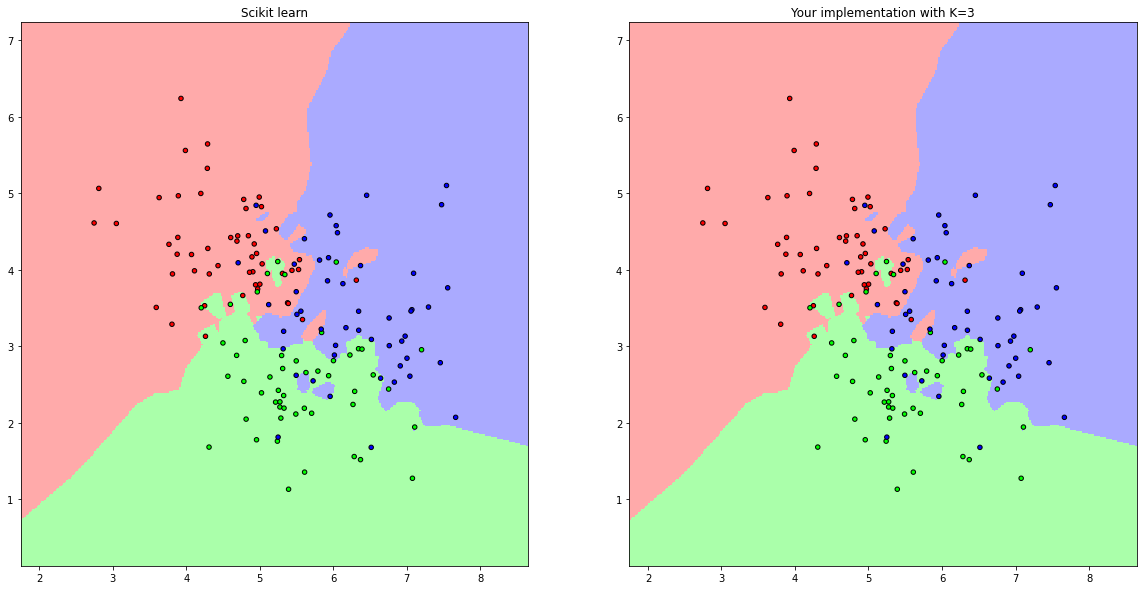

In [64]:
from sklearn import neighbors, datasets, model_selection
import numpy as np
import utils

# Generate the training points from the 3 gaussian distributions
X, y = utils.gaussians()


# Create a grid of testing points
h=.02 # space in the grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx is the x-axis coordinate of the points in the test set
# yy is the y-axis coordinate of the points in the test set
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# X_test contains the test set inputs (xx,yy)
X_test = np.c_[xx.ravel(), yy.ravel()]


# Your KNN implementation
# Parameter K defining the KNN algorithm
K=3
# Create a model for the KNN with inputs the ones from the gaussians and test the model using the grid of testing points
knn_model_yours = KNN(K)
knn_model_yours.train(X, y)
y_test_yours=knn_model_yours.predict(X_test)
# Put the result into a color plot
y_test_yours = y_test_yours.reshape(xx.shape)


#Scikit-learn implementation
knn_model_scikit = neighbors.KNeighborsClassifier(K, algorithm='kd_tree') #, weights=weights)
knn_model_scikit.fit(X, y)
y_hat_scikit = knn_model_scikit.predict(X_test)
# Put the result into a color plot
y_hat_scikit = y_hat_scikit.reshape(xx.shape)    


# Compare results -> see the comparing_plots function in utils.py
utils.comparing_plots(xx,yy, X, y, y_hat_scikit, y_test_yours, "Scikit learn", "Your implementation with K=" + str(K))

# ATTENTION! the circles in the pictures are the training points.
# Each training input can be red, blue or green depending on its label,
# While the predicted labels for each point in the cartesian plane are the coloured areas, which means
# all the red areas contain the points predicted as belonging to the red gaussian,
# all the green areas contain the points predicted as belonging to the green gaussian,...

#### Comparing KNN and Logistic regression
Finally, we will compare the behaviour of a linear model, such as logistic regression, with KNN. 

<div class="alert alert-info">

**Exercise 9:** Using code from Part 2, train a logistic regression model with the training data from the gaussian dataset (called *X* and *y* in previous cell) and then predict the unseen samples <code>X_test</code>. Store your results in a variable called <code>logistic_results</code>. This will be used to plot the regions defined by the decision functions of the logistic regressor.
    
Train your KNN classifier, with a K of your choice and then predict the unseen samples. Store the results in a variable called <code>knn_results</code>.
    
Plot your results.
   
Have a look at the plots:
    
    1. What can you say of the behaviour of the two models? 
    2. Play around with your K. What changes do you see? Which value of K would you recommend to get decision boundaries similar to those of logistic regression?
    3. Based on your results, when would you recommend to use KNN? When a linear model?
</div>

In [65]:
LR_model_g = LogisticRegression(solver='liblinear', max_iter=200, multi_class='auto')
LR_model_g.fit(X, y)
logistic_results = LR_model_g.predict(X_test)
logistic_results_reshaped = logistic_results.reshape(xx.shape)

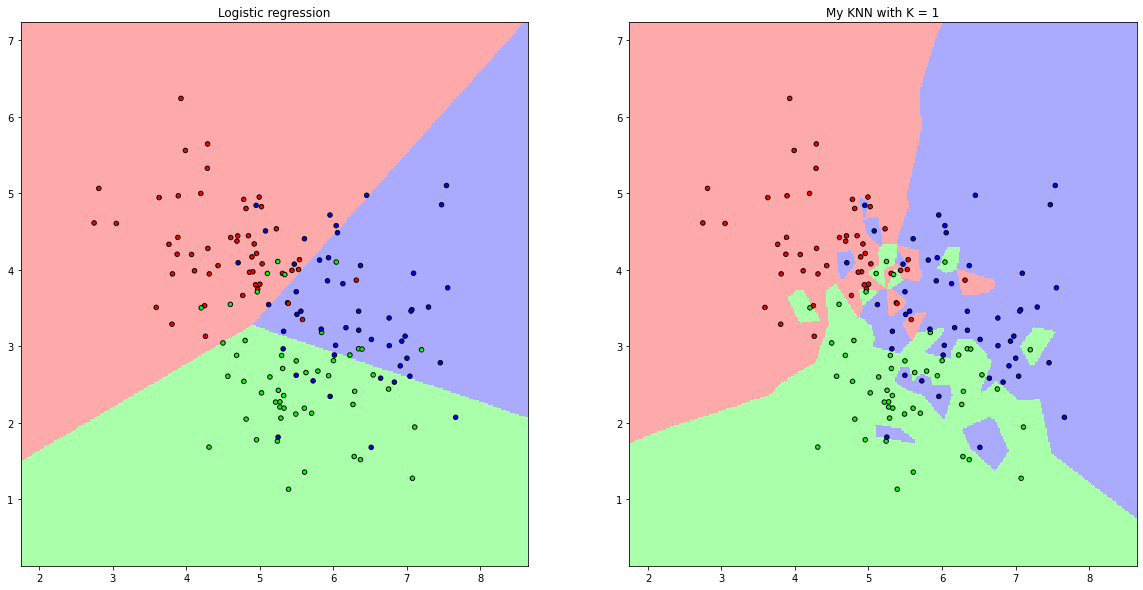

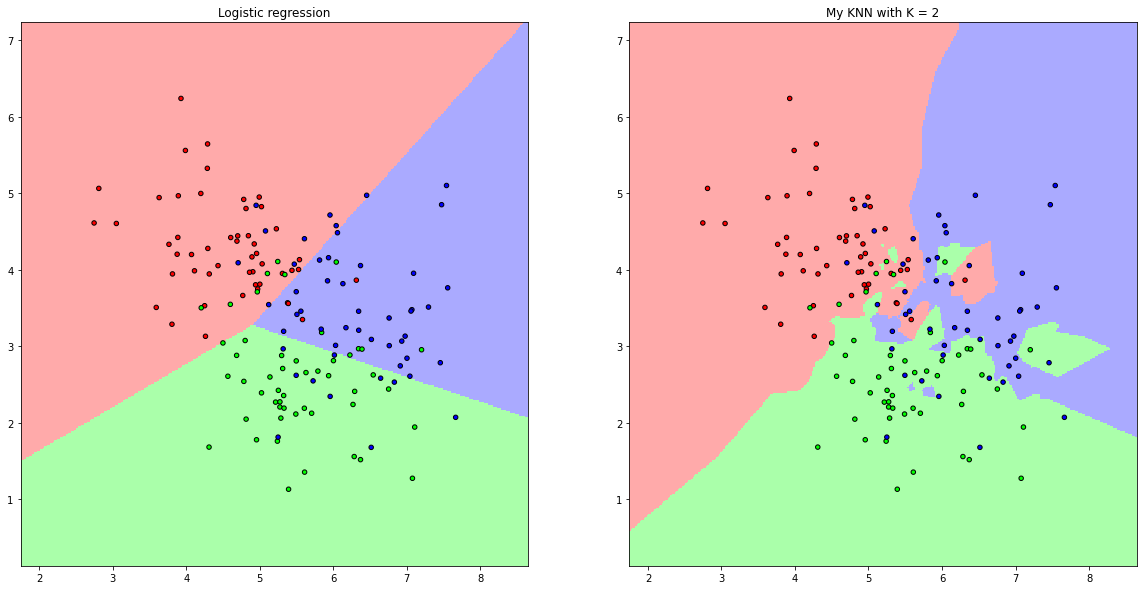

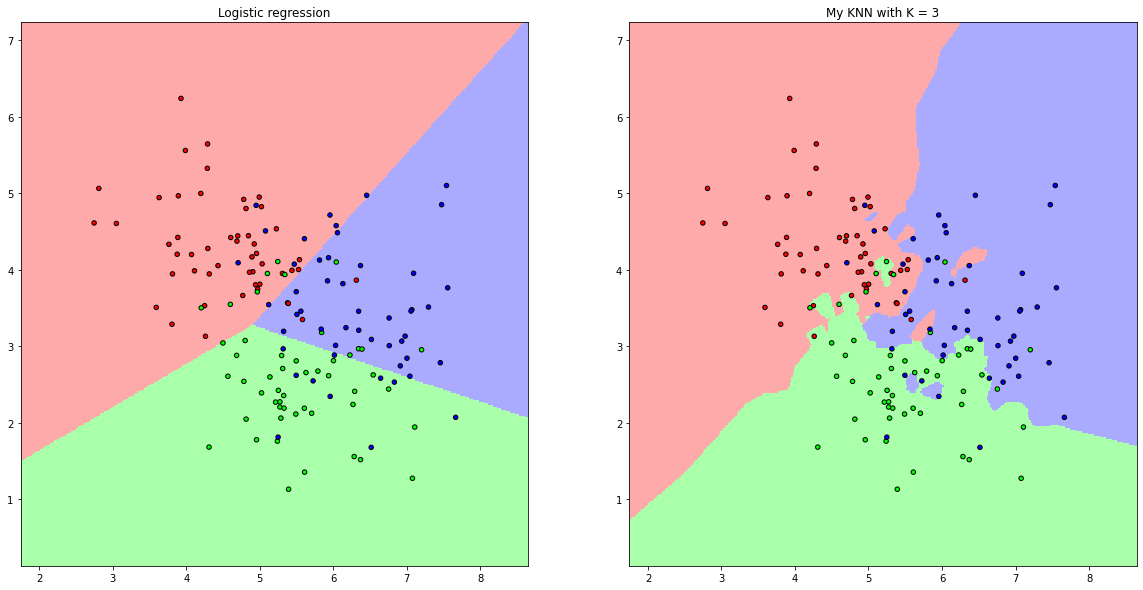

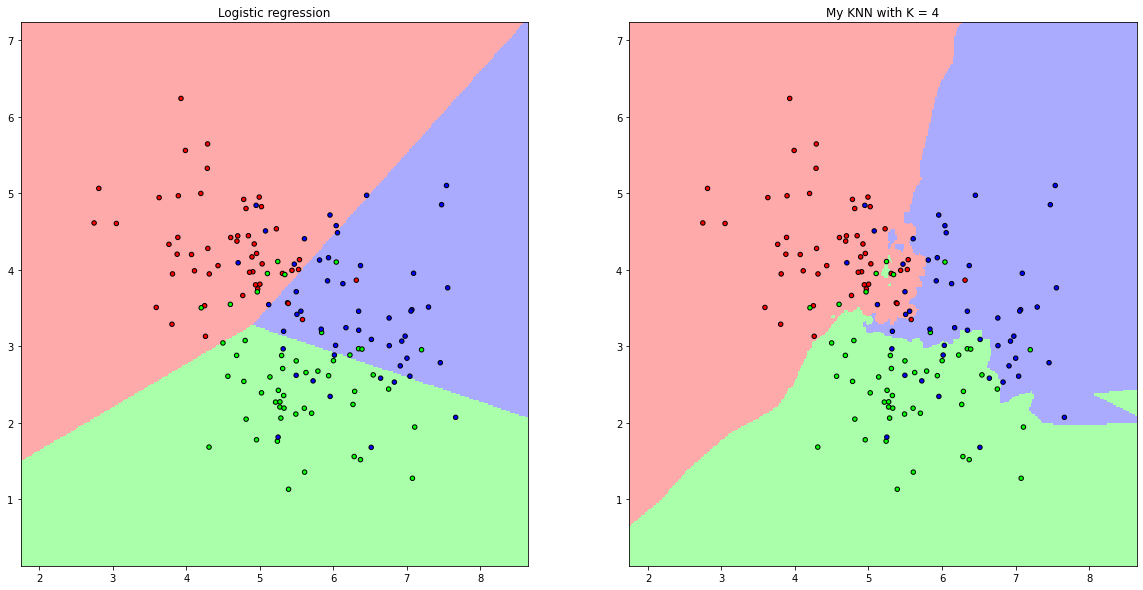

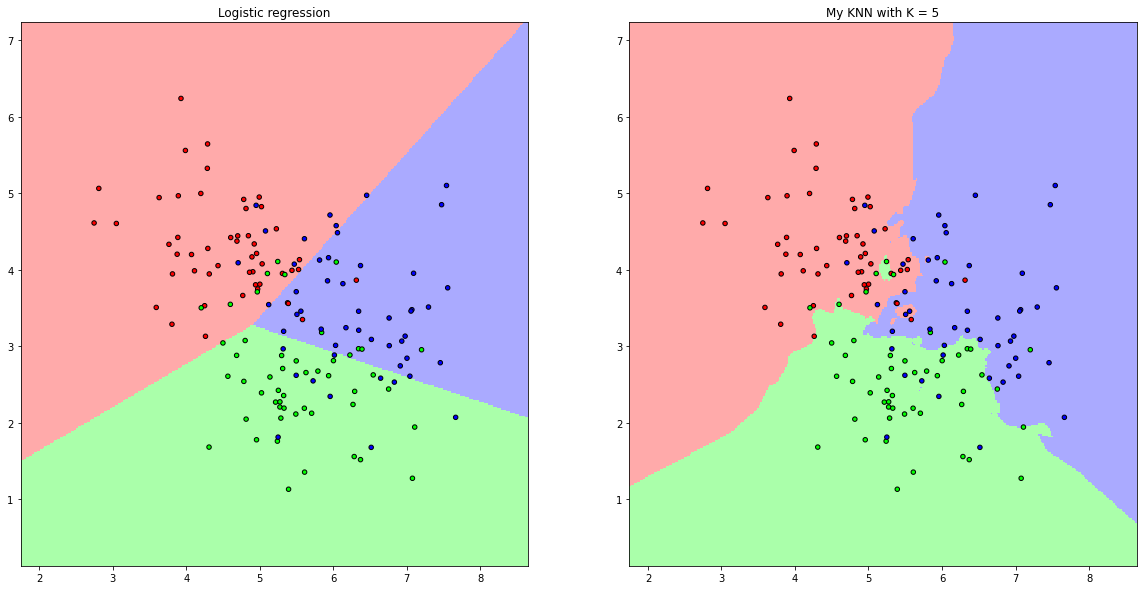

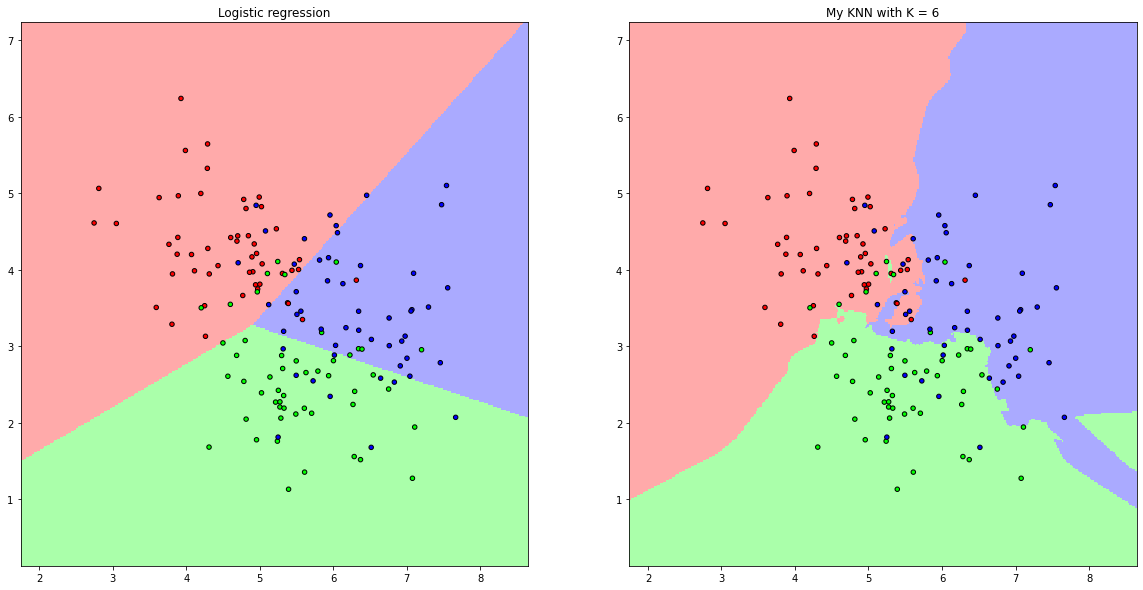

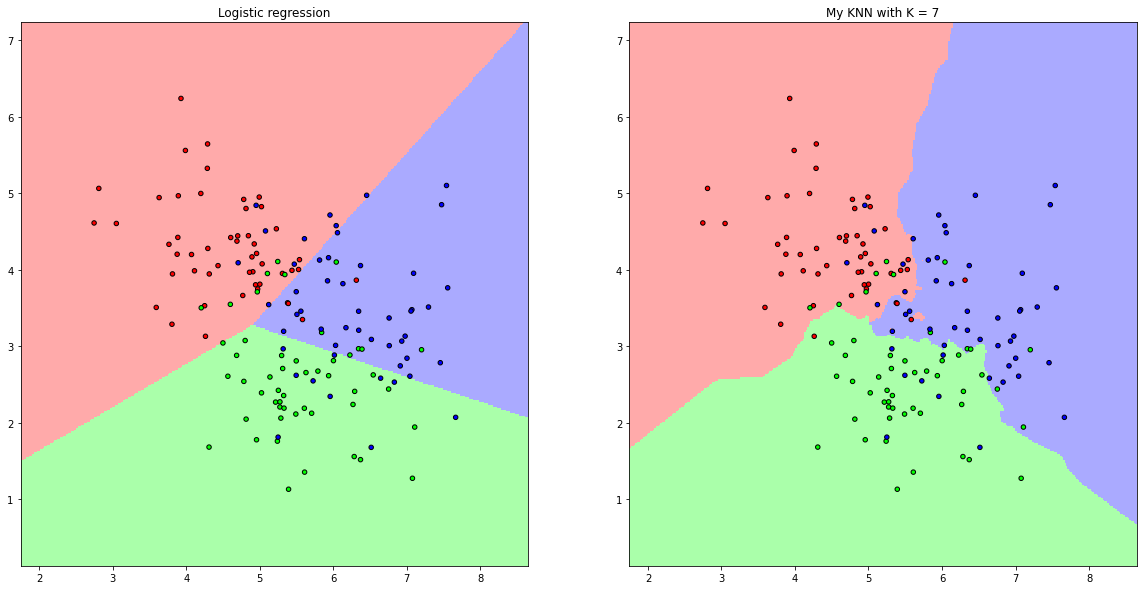

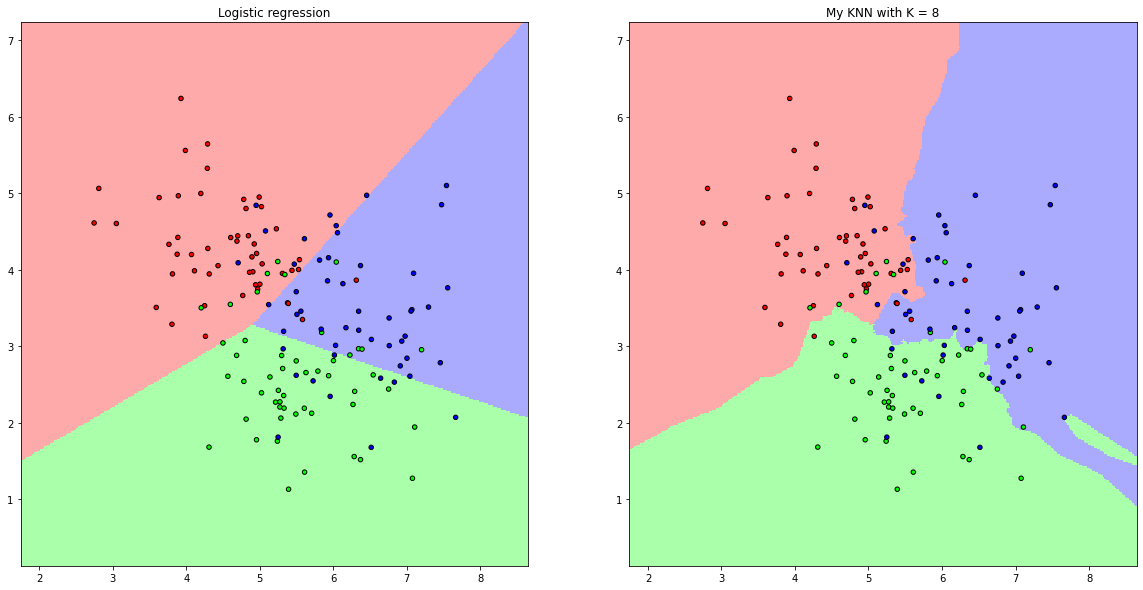

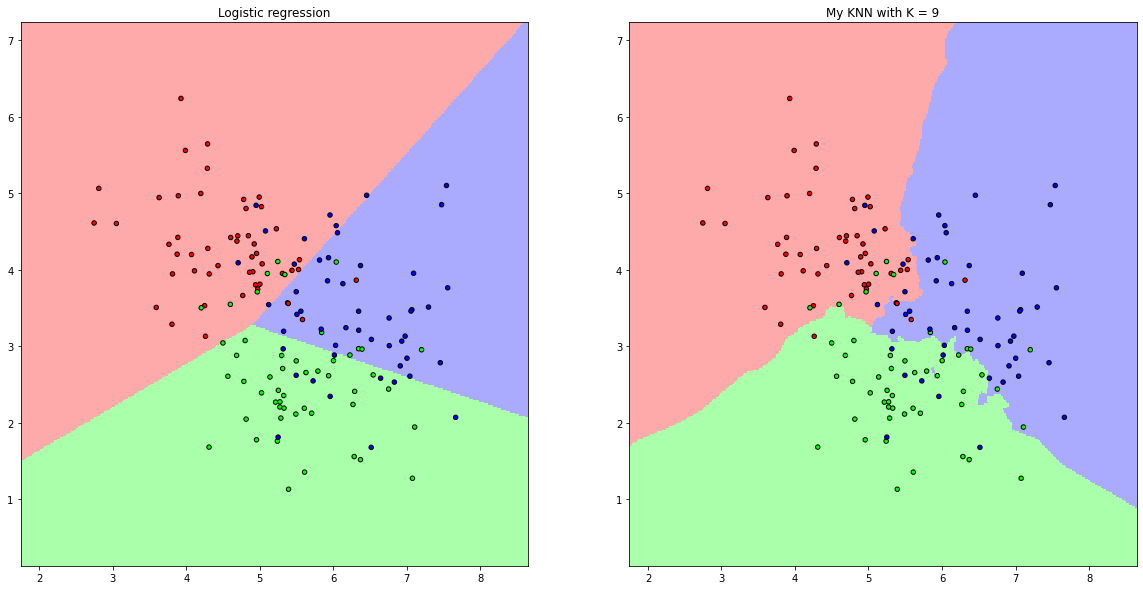

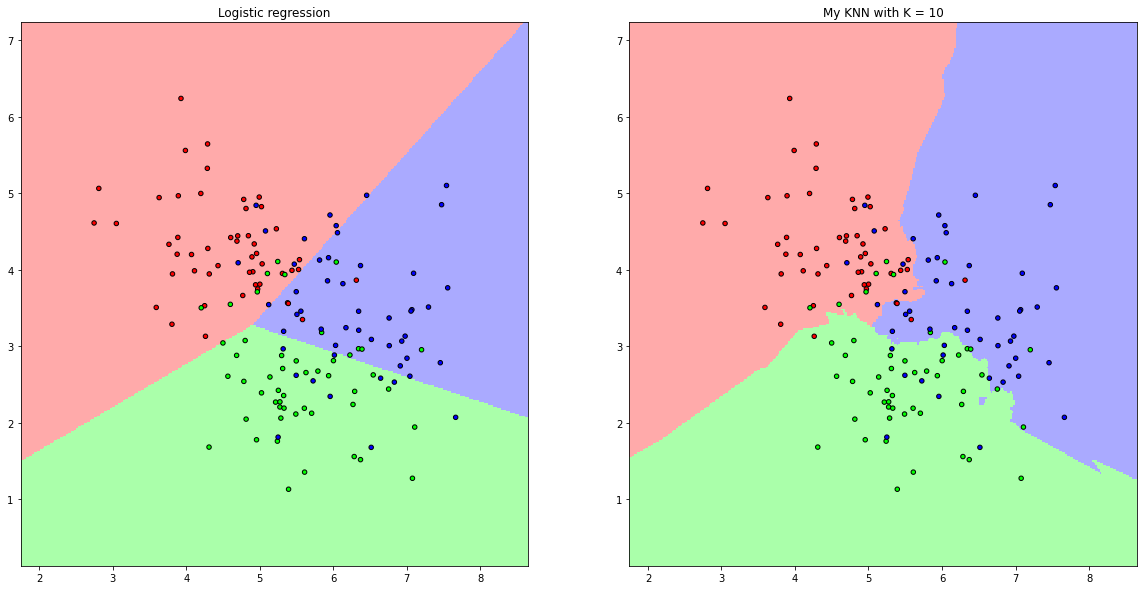

In [66]:
for K in range(1,11):
    knn_model_yours = KNN(K)
    knn_model_yours.train(X, y)
    knn_results=knn_model_yours.predict(X_test)
    knn_results_reshaped = knn_results.reshape(xx.shape)
    utils.comparing_plots(xx,yy, X, y, logistic_results_reshaped, knn_results_reshaped, "Logistic regression", "My KNN with K = " + str(K))
    plt.show()

In [67]:
if print_solutions==True :
    %load ./solutions/part3_exercise9.py

<div class="alert alert-info">
    
**Answer :**
    1: The logistic regression model separates the data in a linear way, and so its performances are worse than a non-linear model such as KNN. KNN doesn't need parameters except for K, which determines how many neighbors' votes will count in prediction for a sample. 2: We plotted KNN for 10 different K values which results are above; we can notice that logistic regression and KNN results are not very similar for K=1,2,3 , while for other K are slightly more similar. We would choose the KNN with K = 9 in order to have similar decision boundaries with respect to logistic regression. 3: KNN is slower in comparison to logistic regression, in addition logistic regression provides only linear solution, while KNN provides non-linear ones (which in this case is more useful in order to classify correctly test samples). So, we would recommend KNN for problems with data non-linearly separable and Logistic Regression for linearly separable data.
</div>